In [82]:
# !pip install scikit-learn
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
!pip install xgboost

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/99.8 MB 3.6 MB/s eta 0:00:28
     ---------------------------------------- 0.4/99.8 MB 4.5 MB/s eta 0:00:23
     ---------------------------------------- 0.8/99.8 MB 6.1 MB/s eta 0:00:17
      --------------------------------------- 1.5/99.8 MB 8.9 MB/s eta 0:00:12
     - -------------------------------------- 2.9/99.8 MB 13.2 MB/s eta 0:00:08
     -- ------------------------------------- 5.6/99.8 MB 21.2 MB/s eta 0:00:05
     --- ------------------------------------ 9.1/99.8 MB 29.2 MB/s eta 0:00:04
     ---- ---------------------------------- 12.7/99.8 MB 73.1 MB/s eta 0:00:02
     ------ -------------------------------- 16.2/99.8 MB 81.8 MB/s eta 0:00:02
     ------- ------------------------------- 20.0/99.8 MB 81.8 MB/s eta 0:00:01
     --------- ----------------------------- 23.6/99.8 MB 81.8 MB/s eta

In [8]:
# 导入工具库
from sklearn.datasets import load_iris    
iris = load_iris()
#数据是以「字典」格式存储的，看看 iris 的键有哪些。
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
#输出iris 数据中特征的大小、名称等信息和前五个样本。
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.feature_names)
print(iris.target.shape)
print(iris.target_names)
iris.data[0:5]

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150,)
['setosa' 'versicolor' 'virginica']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
# 将X和y合并为Dataframe格式数据 
import pandas as pd
import seaborn as sns
iris_data = pd.DataFrame( iris.data,
                          columns=iris.feature_names )
iris_data['species'] = iris.target_names[iris.target]
# iris_data.head(3).append(iris_data.tail(3))

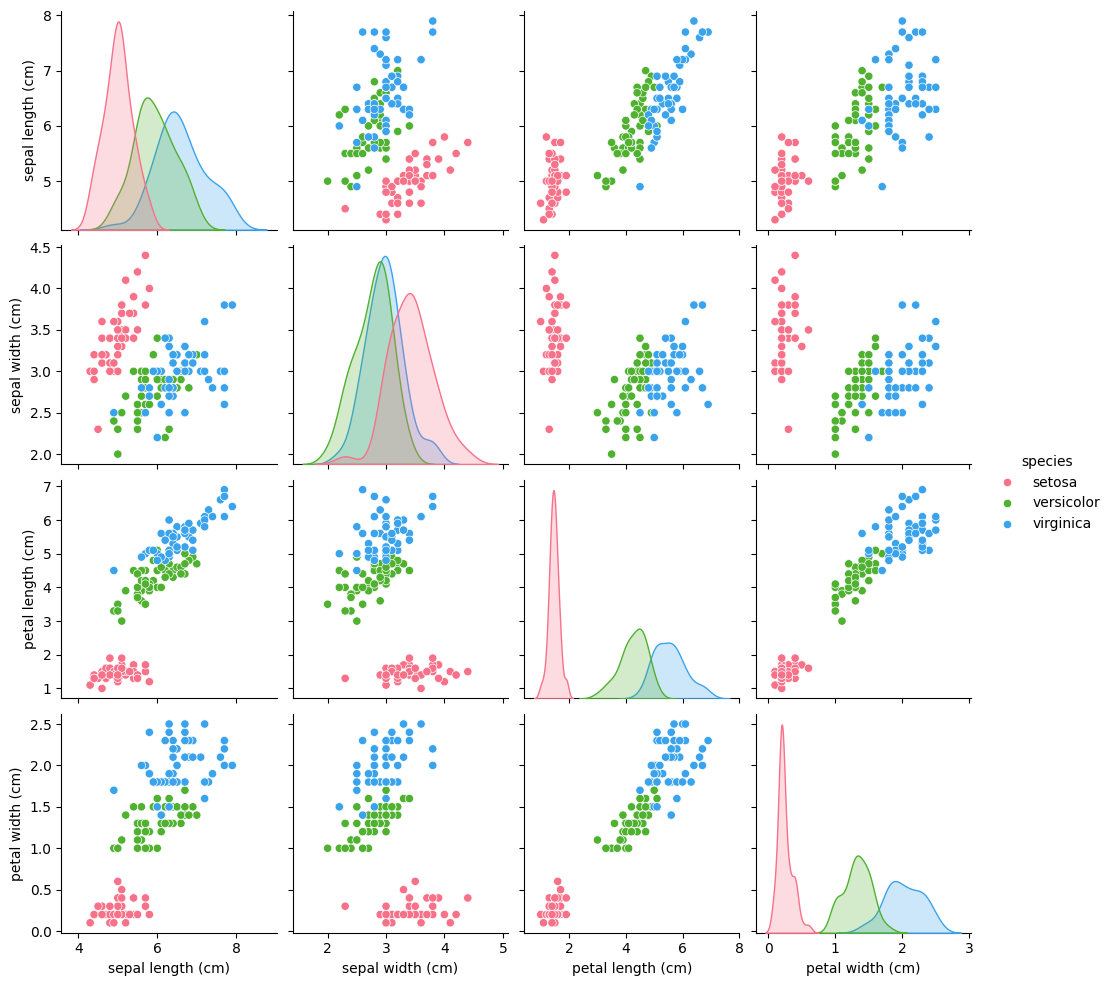

In [13]:
# 使用Seaborn的pairplot查看两两特征之间的关系
sns.pairplot( iris_data, hue='species', palette='husl' )

In [15]:
from sklearn import datasets

#加州房屋数据集
california_housing = datasets.fetch_california_housing()
california_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

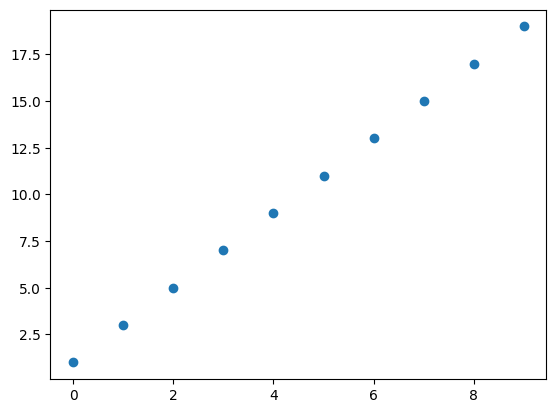

In [18]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(10)
y = 2 * x + 1
plt.plot( x, y, 'o' )

In [19]:
X = x[:, np.newaxis]
model.fit( X, y )

LinearRegression()

In [20]:
print( model.coef_ )
print( model.intercept_ )
# 输出结果

[2.]
0.9999999999999982


In [21]:
from sklearn.cluster import KMeans
model = KMeans( n_clusters=3 )
model

KMeans(n_clusters=3)

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,0:2]
model.fit(X)

KMeans(n_clusters=3)

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier( n_estimators=4, max_depth=5 )
RF.fit( X_train, y_train )

RandomForestClassifier(max_depth=5, n_estimators=4)

In [26]:
print( RF.n_estimators )
RF.estimators_

4


[DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=644403286),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=2019066346),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1804424537),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=370467951)]

In [27]:
print ( "RF - Accuracy (Train):  %.4g" %
        metrics.accuracy_score(y_train, RF.predict(X_train)) )
print ( "RF - Accuracy (Test):  %.4g" %
        metrics.accuracy_score(y_test, RF.predict(X_test)) )

RF - Accuracy (Train):  0.975
RF - Accuracy (Test):  0.9333


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
LR = LogisticRegression( solver='lbfgs', multi_class='multinomial' )
RF = RandomForestClassifier( n_estimators=5 )
GNB = GaussianNB()
Ensemble = VotingClassifier( estimators=[('lr', LR), ('rf', RF), ('gnb', GNB)], voting='hard' )
Ensemble. fit( X_train, y_train )

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial')),
                             ('rf', RandomForestClassifier(n_estimators=5)),
                             ('gnb', GaussianNB())])

In [29]:
print( len(Ensemble.estimators_) )
Ensemble.estimators_

3


[LogisticRegression(multi_class='multinomial'),
 RandomForestClassifier(n_estimators=5),
 GaussianNB()]

In [30]:
# 拟合
LR.fit( X_train, y_train )
RF.fit( X_train, y_train )
GNB.fit( X_train, y_train )

GaussianNB()

In [32]:
# 评估效果
print ( "LR - Accuracy (Train): %.4g" % metrics.accuracy_score(y_train, LR.predict(X_train)) )
print ( "RF - Accuracy (Train): %.4g" % metrics.accuracy_score(y_train, RF.predict(X_train)) )
print ( "GNB - Accuracy (Train): %.4g" % metrics.accuracy_score(y_train, GNB.predict(X_train)) )
print ( "Ensemble - Accuracy (Train): %.4g" % metrics.accuracy_score(y_train, Ensemble.predict(X_train)) )
print ( "LR - Accuracy (Test): %.4g" % metrics.accuracy_score(y_test, LR.predict(X_test)) )
print ( "RF - Accuracy (Test): %.4g" % metrics.accuracy_score(y_test, RF.predict(X_test)) )
print ( "GNB - Accuracy (Test): %.4g" % metrics.accuracy_score(y_test, RF.predict(X_test)) )
print ( "Ensemble - Accuracy (Test): %.4g" % metrics.accuracy_score(y_test, Ensemble.predict(X_test)) )

LR - Accuracy (Train): 0.975
RF - Accuracy (Train): 0.9917
GNB - Accuracy (Train): 0.9667
Ensemble - Accuracy (Train): 0.975
LR - Accuracy (Test): 0.9333
RF - Accuracy (Test): 0.9
GNB - Accuracy (Test): 0.9
Ensemble - Accuracy (Test): 0.9333


In [36]:
# 导入数据
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()
# 数据集切分
X_train, X_test, y_train, y_test = train_test_split( digits['data'], digits['target'], test_size=0.2 )
print( 'The size of X_train is ', X_train.shape )
print( 'The size of y_train is ', y_train.shape )
print( 'The size of X_test is ', X_test.shape )
print( 'The size of y_test is ', y_test.shape )

The size of X_train is  (1437, 64)
The size of y_train is  (1437,)
The size of X_test is  (360, 64)
The size of y_test is  (360,)


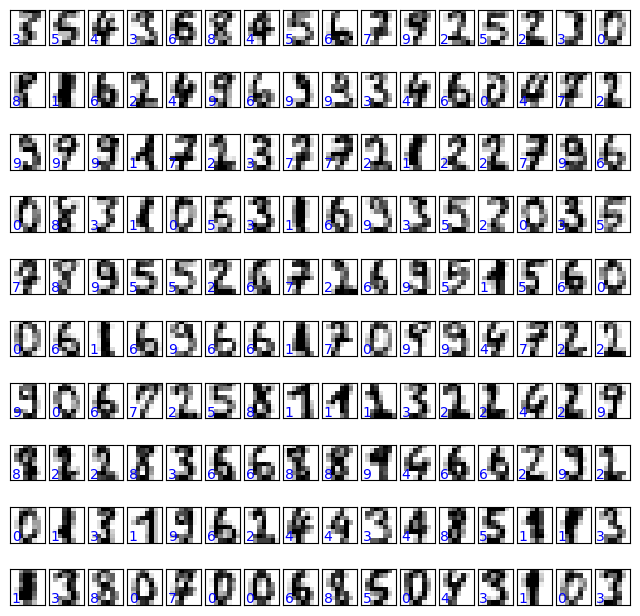

In [37]:
fig, axes = plt.subplots( 10, 16, figsize=(8, 8) )
fig.subplots_adjust( hspace=0.1, wspace=0.1 )
for i, ax in enumerate( axes.flat ):
    ax.imshow( X_train[i,:].reshape(8,8), cmap='binary', interpolation='nearest')
    ax.text( 0.05, 0.05, str(y_train[i]),
             transform=ax.transAxes, color='blue')
    ax.set_xticks([])
    ax.set_yticks([])

In [38]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
ovo_lr = OneVsOneClassifier( LogisticRegression(solver='lbfgs', max_iter=200) )
ovo_lr.fit( X_train, y_train )

OneVsOneClassifier(estimator=LogisticRegression(max_iter=200))

In [39]:
print( len(ovo_lr.estimators_) )
ovo_lr.estimators_

45


(LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(max_iter=200),
 LogisticRegression(

In [41]:
print ( "OvO LR - Accuracy (Train): %.4g" % metrics.accuracy_score(y_train, ovo_lr.predict(X_train)) )
print ( "OvO LR - Accuracy (Test): %.4g" % metrics.accuracy_score(y_test, ovo_lr.predict(X_test)))

OvO LR - Accuracy (Train): 1
OvO LR - Accuracy (Test): 0.9917


In [42]:
from sklearn.multiclass import OneVsRestClassifier
ova_lr = OneVsRestClassifier( LogisticRegression(solver='lbfgs', max_iter=800) )
ova_lr.fit( X_train, y_train )

OneVsRestClassifier(estimator=LogisticRegression(max_iter=800))

In [43]:
print( len(ova_lr.estimators_) )
ova_lr.estimators_

10


[LogisticRegression(max_iter=800),
 LogisticRegression(max_iter=800),
 LogisticRegression(max_iter=800),
 LogisticRegression(max_iter=800),
 LogisticRegression(max_iter=800),
 LogisticRegression(max_iter=800),
 LogisticRegression(max_iter=800),
 LogisticRegression(max_iter=800),
 LogisticRegression(max_iter=800),
 LogisticRegression(max_iter=800)]

In [46]:
print ( "OvA LR - Accuracy (Train): %.4g" % metrics.accuracy_score(y_train, ova_lr.predict(X_train)) )
print ( "OvA LR - Accuracy (Test): %.4g" % metrics.accuracy_score(y_test, ova_lr.predict(X_test)) )

OvA LR - Accuracy (Train): 0.9986
OvA LR - Accuracy (Test): 0.9583


In [47]:
from sklearn.multiclass import OneVsRestClassifier
y_train_multilabel = np.c_[y_train%2==0, y_train<=4 ]
print(y_train_multilabel)

[[False  True]
 [False False]
 [ True  True]
 ...
 [ True  True]
 [ True False]
 [ True False]]


In [48]:
ova_ml = OneVsRestClassifier( LogisticRegression(solver='lbfgs', max_iter=800) )
ova_ml.fit( X_train, y_train_multilabel )

OneVsRestClassifier(estimator=LogisticRegression(max_iter=800))

In [49]:
print( len(ova_ml.estimators_) )
ova_ml.estimators_

2


[LogisticRegression(max_iter=800), LogisticRegression(max_iter=800)]

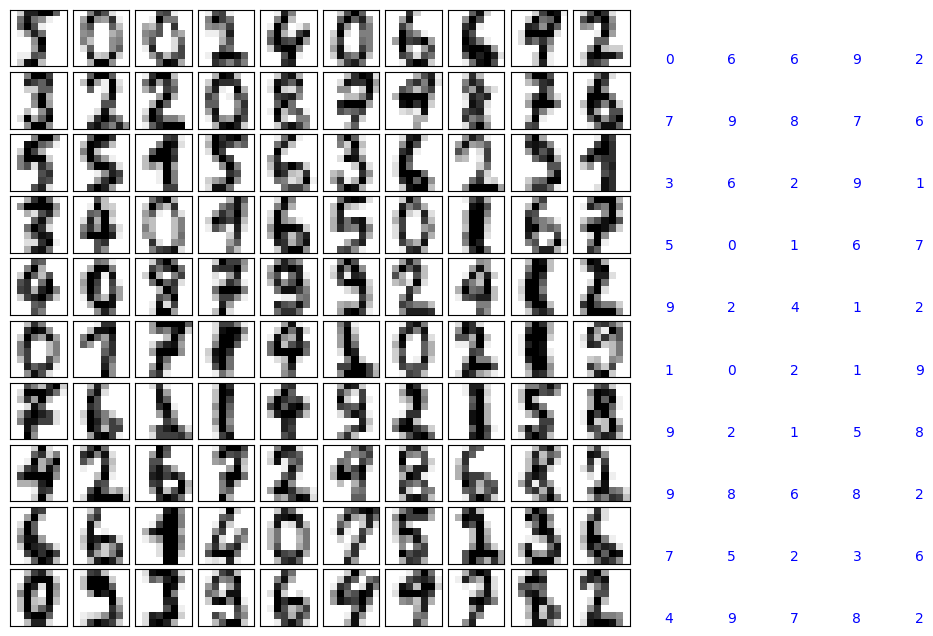

In [50]:
fig, axes = plt.subplots( 10, 10, figsize=(8, 8) )
fig.subplots_adjust( hspace=0.1, wspace=0.1 )
for i, ax in enumerate( axes.flat ):
    ax.imshow( X_test[i,:].reshape(8,8), cmap='binary', interpolation='nearest')
    ax.text( 6.05, 0.05, str(y_test[i]), transform=ax.transAxes, color='blue')
    ax.set_xticks([])
    ax.set_yticks([])

In [51]:
print( y_test[:1] )
print( ova_ml.predict(X_test[:1,:]) )

[5]
[[0 0]]


In [52]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
y_train_1st = y_train.copy()
y_train_1st[ y_train<=4 ] = 0
y_train_1st[ np.logical_and(y_train>4, y_train<7) ] = 1
y_train_1st[ y_train>=7 ] = 2
y_train_multioutput = np.c_[y_train_1st, y_train]
y_train_multioutput

array([[0, 3],
       [1, 5],
       [0, 4],
       ...,
       [0, 4],
       [2, 8],
       [2, 8]])

In [55]:
MO = MultiOutputClassifier( RandomForestClassifier(n_estimators=100) )
MO.fit( X_train, y_train_multioutput )

MultiOutputClassifier(estimator=RandomForestClassifier())

In [56]:
MO.predict( X_test[:5,:] )

array([[1, 5],
       [0, 0],
       [0, 0],
       [0, 2],
       [0, 4]])

In [57]:
y_test_1st = y_test.copy()
y_test_1st[ y_test<=4 ] = 0
y_test_1st[ np.logical_and(y_test>4, y_test<7) ] = 1
y_test_1st[ y_test>=7 ] = 2
y_test_multioutput = np.c_[ y_test_1st, y_test ]
y_test_multioutput[:5]

array([[1, 5],
       [0, 0],
       [0, 0],
       [0, 2],
       [0, 4]])

In [62]:
from time import time
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
X, y = digits.data, digits.target
RFC = RandomForestClassifier(n_estimators=20)
# 随机搜索/Randomized Search
param_dist = {  "max_depth": [3, 5],
                "max_features": randint(1, 11),
                "min_samples_split": randint(2, 11),
                "criterion": ["gini", "entropy"]}
n_iter_search = 20
random_search = RandomizedSearchCV( RFC, param_distributions=param_dist, n_iter=n_iter_search, cv=5 )
start = time()
random_search.fit(X, y)
print("RandomizedSearchCv took %.2f seconds for %d candidates，parameter settings." % ((time() - start), n_iter_search))
print( random_search.best_params_ )
print( random_search.best_score_ )
# 网格搜索/Grid Search
param_grid = {  "max_depth": [3, 5],
"max_features": [1, 3, 10],
"min_samples_split": [2, 3, 10],
"criterion": ["gini", "entropy"]}
grid_search = GridSearchCV( RF, param_grid=param_grid, cv=5 )
start = time()
grid_search.fit(X, y)
print("\
GridSearchcv took %.2f seconds for %d candidate parameter settings." % (time() - start, len(grid_search.cv_results_['params'])))
print( grid_search.best_params_ )
print( grid_search.best_score_ )

RandomizedSearchCv took 1.98 seconds for 20 candidates，parameter settings.
{'criterion': 'gini', 'max_depth': 5, 'max_features': 10, 'min_samples_split': 5}
0.8837233054781801
GridSearchcv took 1.10 seconds for 36 candidate parameter settings.
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 10, 'min_samples_split': 3}
0.8225023212627669


In [63]:
X = np.array([[56,40,30,5,7,10,9,np.NaN,12],
              [1.68,1.83,1.77,np.NaN,1.9,1.65,1.88,np.NaN,1.75]])
X = np.transpose(X)

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
pipe = Pipeline([
    ('impute', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('normalize', MinMaxScaler())])

In [67]:
X_proc = pipe.fit_transform( X )
X_proc

array([[1.        , 0.12      ],
       [0.68627451, 0.72      ],
       [0.49019608, 0.48      ],
       [0.        , 0.52      ],
       [0.03921569, 1.        ],
       [0.09803922, 0.        ],
       [0.07843137, 0.92      ],
       [0.31617647, 0.52      ],
       [0.1372549 , 0.4       ]])

In [66]:
X_impute = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform( X )
X_impute

array([[56.   ,  1.68 ],
       [40.   ,  1.83 ],
       [30.   ,  1.77 ],
       [ 5.   ,  1.78 ],
       [ 7.   ,  1.9  ],
       [10.   ,  1.65 ],
       [ 9.   ,  1.88 ],
       [21.125,  1.78 ],
       [12.   ,  1.75 ]])

In [68]:
X_normalize = MinMaxScaler().fit_transform( X_impute )
X_normalize

array([[1.        , 0.12      ],
       [0.68627451, 0.72      ],
       [0.49019608, 0.48      ],
       [0.        , 0.52      ],
       [0.03921569, 1.        ],
       [0.09803922, 0.        ],
       [0.07843137, 0.92      ],
       [0.31617647, 0.52      ],
       [0.1372549 , 0.4       ]])

In [69]:
d= { 'IQ' : ['high','avg','avg','low', 'high', 'avg', 'high', 'high',None],
     'temper' : ['good', None,'good', 'bad', 'bad','bad', 'bad', None, 'bad'],
     'income' : [50,40,30,5,7,10,9,np.NaN,12],
     'height' : [1.68,1.83,1.77,np.NaN,1.9,1.65,1.88,np.NaN,1.75]}
X = pd.DataFrame( d )
X

,IQ,temper,income,height
0,high,good,50.0,1.68
1,avg,None,40.0,1.83
2,avg,good,30.0,1.77
3,low,bad,5.0,NaN
4,high,bad,7.0,1.90
5,avg,bad,10.0,1.65
6,high,bad,9.0,1.88
7,high,None,NaN,NaN
8,None,bad,12.0,1.75


In [74]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin ):
    def __init__( self, attribute_names ):
        self.attribute_names = attribute_names
    def fit( self, X, y=None ):
        return self
    def transform( self, X ):
        return X[self.attribute_names].values

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['IQ', 'temper']
numeric_features = ['income', 'height']
categorical_pipe = Pipeline([
        ('select', DataFrameSelector(categorical_features)),
        ('impute', SimpleImputer(missing_values=None, strategy='most_frequent')),
        ('one_hot_encode', OneHotEncoder())
    ])
numeric_pipe = Pipeline([
    ('select', DataFrameSelector(numeric_features)),
    ('impute', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('normalize', MinMaxScaler())])
full_pipe = FeatureUnion( transformer_list=[
    ('numeric_pipe', numeric_pipe),
    ('categorical_pipe', categorical_pipe)])

In [80]:
X_proc = full_pipe.fit_transform( X )
print( X_proc )

  (0, 0)	1.0
  (0, 1)	0.1200000000000001
  (0, 3)	1.0
  (0, 6)	1.0
  (1, 0)	0.7777777777777778
  (1, 1)	0.7200000000000006
  (1, 2)	1.0
  (1, 5)	1.0
  (2, 0)	0.5555555555555556
  (2, 1)	0.4800000000000004
  (2, 2)	1.0
  (2, 6)	1.0
  (3, 1)	0.5199999999999996
  (3, 4)	1.0
  (3, 5)	1.0
  (4, 0)	0.04444444444444444
  (4, 1)	1.0
  (4, 3)	1.0
  (4, 5)	1.0
  (5, 0)	0.11111111111111112
  (5, 2)	1.0
  (5, 5)	1.0
  (6, 0)	0.08888888888888889
  (6, 1)	0.9199999999999999
  (6, 3)	1.0
  (6, 5)	1.0
  (7, 0)	0.3416666666666667
  (7, 1)	0.5199999999999996
  (7, 3)	1.0
  (7, 5)	1.0
  (8, 0)	0.15555555555555556
  (8, 1)	0.40000000000000036
  (8, 3)	1.0
  (8, 5)	1.0


In [86]:
import pickle
import xgboost as xgb
import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.datasets import load_iris, load_digits
rng = np.random.RandomState(31337)
# 二分类：混淆矩阵
print("数字0和1的二分类问题")
digits = load_digits()
y = digits['target']
X = digits['data']
# 数据切分对象
kf = KFold(n_splits=2, shuffle=True, random_state=rng)
print("在2折数据上的交叉验证")
# 2折交叉验证
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBClassifier().fit(X[train_index],y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print("混淆矩阵:")
    print(confusion_matrix(actuals, predictions))
#多分类：混淆矩阵
print("\
Iris: 多分类")
iris = load_iris()
y = iris['target']
X = iris['data']
kf = KFold(n_splits=2, shuffle=True, random_state=rng)
print("在2折数据上的交叉验证")
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBClassifier().fit(X[train_index],y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print("混淆矩阵:")
    print(confusion_matrix(actuals, predictions))
#回归问题：MSE
print("\
波士顿房价回归预测问题")
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

# boston = load_boston()
# y = boston['target']
# X = boston['data']

kf = KFold(n_splits=2, shuffle=True, random_state=rng)
print("在2折数据上的交叉验证")
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBRegressor().fit(X[train_index],y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print("MSE:",mean_squared_error(actuals, predictions))

数字0和1的二分类问题
在2折数据上的交叉验证
混淆矩阵:
[[90  0  0  0  0  0  0  0  0  0]
 [ 2 83  1  3  1  1  0  0  1  3]
 [ 0  0 94  1  0  0  0  1  0  0]
 [ 0  0  0 87  0  1  0  2  3  2]
 [ 0  2  0  0 78  0  0  0  0  2]
 [ 0  0  0  0  0 83  0  0  0  4]
 [ 0  0  0  0  0  1 91  0  1  0]
 [ 0  1  0  0  1  3  0 83  0  0]
 [ 0  1  1  0  0  1  1  0 79  5]
 [ 3  2  0  2  0  0  0  1  0 77]]
混淆矩阵:
[[87  0  0  0  0  0  0  0  1  0]
 [ 0 87  0  0  0  0  0  0  0  0]
 [ 0  1 80  0  0  0  0  0  0  0]
 [ 0  2  0 83  0  2  0  0  0  1]
 [ 0  1  0  0 97  0  0  1  0  0]
 [ 0  1  0  0  2 87  1  1  1  2]
 [ 1  2  0  0  0  0 85  0  0  0]
 [ 0  1  0  0  0  0  0 89  1  0]
 [ 0  6  0  0  0  1  0  1 78  0]
 [ 0  0  0  2  0  0  0  7  2 84]]
Iris: 多分类
在2折数据上的交叉验证
混淆矩阵:
[[29  0  0]
 [ 1 20  1]
 [ 0  4 20]]
混淆矩阵:
[[21  0  0]
 [ 0 26  2]
 [ 0  2 24]]
波士顿房价回归预测问题
在2折数据上的交叉验证
MSE: 16.36868272153804
MSE: 13.477913407825207


In [87]:
xgb_model = xgb.XGBRegressor()
clf = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, verbose=1)
clf.fit(X,y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.6608184415825245
{'max_depth': 2, 'n_estimators': 200}


特征排序：
特征 petal_length 重要度为 0.676586
特征 petal_width 重要度为 0.297366
特征 sepal_width 重要度为 0.016450
特征 sepal_length 重要度为 0.009598


([<matplotlib.axis.XTick at 0x1cff9624670>,
 [Text(0, 0, 'petal_length'),
  Text(1, 0, 'petal_width'),
  Text(2, 0, 'sepal_width'),
  Text(3, 0, 'sepal_length')])

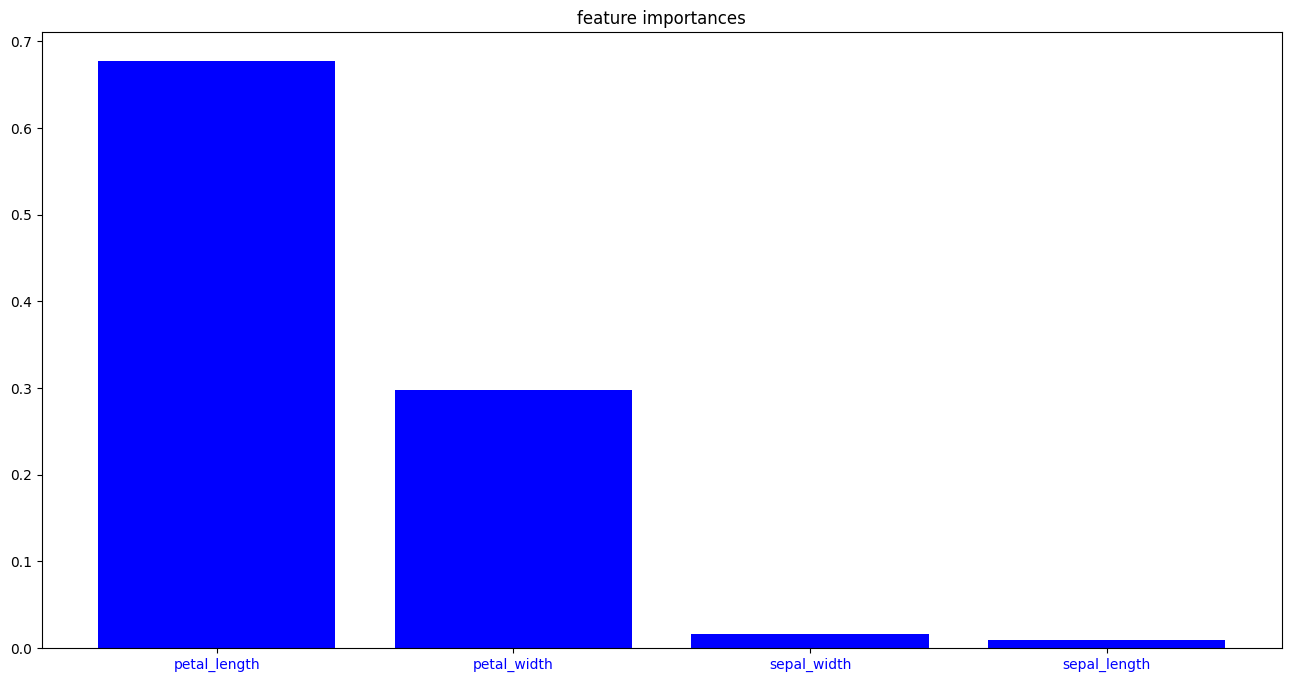

In [88]:
iris = load_iris()
y = iris['target']
X = iris['data']
xgb_model = xgb.XGBClassifier().fit(X,y)
print('特征排序：')
feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
feature_importances = xgb_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
for index in indices:
    print("特征 %s 重要度为 %f" %(feature_names[index], feature_importances[index]))
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title("feature importances")
plt.bar(range(len(feature_importances)), feature_importances[indices], color='b')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], color='b')